<font size=40>Линейная регрессия


#Введение

Цель работы - предсказать стоимость коттеджа по его признакам.

**Описание переменных**

PRICE - стоимость коттеджа в тысячах долларов США

HOUSE - площадь коттеджа в квадратных метрах

AREA - площадь участка в сотках

DIST - расстояние от расположения недвижимости до автомобильной дороги(например, до кольцевой автодороги) в километрах.(Пример)

TER - индикатор, принимающий значение 1, если с коттеджом есть терраса или веранда, и 0 -иначе

#Подготовка данных

Подключаем библиотеки pandas, matplotlib.pyplot, numpy, stats:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Подключаем необходимые инструменты из пакета Scikit-learn

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Импортируем данные

In [3]:
ds = pd.read_excel("Info (5).xlsx", skiprows = 1, sheet_name = 'V(1)')
ds

,Price,House,Area,Dist,Ter
0,220.0,500,40.0,26.0,1
1,95.0,530,19.0,23.0,0
2,45.0,350,7.0,25.0,0
3,120.0,150,10.0,26.0,1
4,95.0,370,15.0,45.0,1
5,120.0,300,24.0,20.0,1
6,16.5,78,8.5,60.0,0
7,25.0,80,10.0,50.0,1
8,20.0,65,6.0,25.0,0
9,20.0,90,6.0,45.0,0


Выделим целевую переменную Price в переменную y1

In [4]:
y1 = ds['Price']
y1

0     220.0
1      95.0
2      45.0
3     120.0
4      95.0
5     120.0
6      16.5
7      25.0
8      20.0
9      20.0
10    100.0
11     25.0
12     50.0
13      8.5
14     16.5
15    320.0
16    300.0
17     60.0
18     14.0
19     38.0
20     85.0
21     85.0
22     28.0
23     83.0
24     80.0
25     15.0
26     27.0
27     42.0
28      5.5
29     47.0
30      5.0
31     59.0
32     27.0
33    270.0
34     96.0
35     95.0
36      6.0
37    120.0
38    135.0
39    315.0
40     10.0
41    230.0
42     15.0
43    130.0
44     16.5
45      7.0
46    110.0
47     13.0
Name: Price, dtype: float64

Выделим матрицу исходных признаков в переменную X1



In [5]:
X1 = ds.drop('Price', axis = 1)
X1

,House,Area,Dist,Ter
0,500,40.0,26.0,1
1,530,19.0,23.0,0
2,350,7.0,25.0,0
3,150,10.0,26.0,1
4,370,15.0,45.0,1
5,300,24.0,20.0,1
6,78,8.5,60.0,0
7,80,10.0,50.0,1
8,65,6.0,25.0,0
9,90,6.0,45.0,0


Разделим выборку на обучающую и тестовую, отнеся в тестовую часть 20% данных, а в обучающую - остальные 80%.

Используем функцию train_test_split

In [6]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, train_size = 0.8)
X1_train, X1_test, y1_train, y1_test

(    House  Area   Dist  Ter
 29    285  15.0   74.0    0
 1     530  19.0   23.0    0
 19     65   6.0   18.0    1
 36     36   6.0   65.0    0
 39    450  25.0   25.0    1
 33    350  15.0   15.0    1
 26    180  17.0   86.0    0
 47     70   6.0   50.0    1
 32    130   6.0   12.0    0
 37    300  32.0   28.0    1
 7      80  10.0   50.0    1
 43    130  15.0   27.0    1
 42     46  15.0  100.0    0
 6      78   8.5   60.0    0
 12    100  10.0   85.0    1
 25     36  10.0   46.0    1
 20    320  20.0   25.0    0
 3     150  10.0   26.0    1
 8      65   6.0   25.0    0
 45     46  15.0  100.0    0
 35    200  14.0   25.0    0
 28     36  12.0   85.0    0
 31    420  10.0    9.0    0
 16    400  22.0   20.0    1
 0     500  40.0   26.0    1
 46    170  10.0   25.0    1
 22     60   5.0   30.0    1
 9      90   6.0   45.0    0
 40     36  12.0  105.0    0
 44     56  15.0   75.0    0
 24    200  20.0   25.0    1
 27    250  15.0   85.0    1
 38    170  15.0   30.0    1
 30     36  10

#Обучение модели

Введем новый объект - модель линейной регрессии

In [7]:
model = LinearRegression(fit_intercept=True)

Обучаем модель на наших данных

In [8]:
ml = model.fit(X1_train, y1_train)

Посмотрим на результат обучения. Оценки коэффициентов перед знаками

In [9]:
ml.coef_

array([ 0.27555009,  1.95705484, -0.62374602, 57.42436466])

Оценка свободного коэффициента

In [10]:
ml.intercept_

4.833046363347762

#Тестирование и оценка качества

##Оценка качества модели на обучающей выборке

Выполним предсказание значений целевой функции моделью с помощью метода predict

In [11]:
y1_pred = ml.predict(X1_train)
y1_pred

array([ 66.56343863, 173.71247645,  80.68306743, -14.04831264,
       219.58767107, 178.69957408,  34.05983685,  62.10094528,
        44.9119346 , 190.0833037 ,  72.68466552, 110.59360252,
       -15.51042886,   5.53615824,  56.36455663,  63.05544572,
       116.55652079, 106.94307611,  18.89248065, -15.51042886,
        71.74818122, -14.78090398, 134.52091749, 203.05773225,
       262.09725202, 113.07782389,  69.86330993,  13.30631248,
       -27.25582434,   2.83872248, 140.9148749 , 107.48234401,
       119.74436798, -24.93247384,   5.21144341,  52.191462  ,
        89.98848723, 173.96638695])

Вычислим остатки - разности между имеющимися значениями и предсказанными значениями целевой переменной

In [12]:
e_ml = y1_train - y1_pred
e_ml

29    -19.563439
1     -78.712476
19    -42.683067
36     20.048313
39     95.412329
33     91.300426
26     -7.059837
47    -49.100945
32    -17.911935
37    -70.083304
7     -47.684666
43     19.406397
42     30.510429
6      10.963842
12     -6.364557
25    -48.055446
20    -31.556521
3      13.056924
8       1.107519
45     22.510429
35     23.251819
28     20.280904
31    -75.520917
16     96.942268
0     -42.097252
46     -3.077824
22    -41.863310
9       6.693688
40     37.255824
44     13.661278
24    -60.914875
27    -65.482344
38     15.255632
30     29.932474
14     11.288557
17      7.808538
21     -4.988487
15    146.033613
Name: Price, dtype: float64

Построим диаграмму остатков

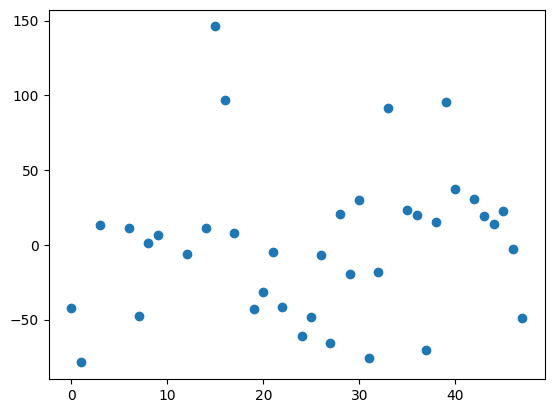

In [13]:
plt.scatter(e_ml.index, e_ml)

Исходя из диаграммы, имеется сравнительно небольшое количество больших остатков. Значит, качество модели на обучающей выборке является высоким.

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [14]:
R2_ml = metrics.explained_variance_score(y1_train, y1_pred)
R2_ml

0.6918669305312106

Относительно низкая величина коэффициента детерминации подтверждает вывод о невысоком качестве модели на обучающей выборке

Вычислим метрику **MAPE** с помощью  функции mean_absolute_percentage_error

In [15]:
mape_ml = metrics.mean_absolute_percentage_error(y1_train, y1_pred) * 100
mape_ml

119.37142430842403

Большая величина метрики (намного больше, чем 15) также говорит о невысоком качестве модели на обучающей выборке

###**Вывод**

Таким образом, исследуемая модель обладает невысоким качеством на обучающей выборке

Вычислим дополнительные характеристики - метрики MSE и MAE. Они потребуются для сравнения качества модели на обучающей и тестовой выборках.

Метрика MSE:

In [16]:
mse_ml = metrics.mean_squared_error(y1_train, y1_pred)
mse_ml

2461.406435798858

Метрика MAE:

In [17]:
mae_ml = metrics.mean_absolute_error(y1_train, y1_pred)
mae_ml

37.51164216181203

##Оценка качества модели на тестовой выборке

Выполним предсказание значений целевой функции моделью
с помощью метода predict

In [18]:
y1_test_pred = ml.predict(X1_test)
y1_test_pred

array([ 99.38131053, 175.21454832,  29.19878845,  44.18087786,
        78.73099234, 165.49819529,  92.52780059, 179.41683314,
       252.5770642 ,  64.53097977])

Вычислим остатки - разности между имеющимися значениями и предсказанными значениями целевой переменной

In [19]:
e_test_ml = y1_test - y1_test_pred
e_test_ml

2     -54.381311
41     54.785452
11     -4.198788
18    -30.180878
23      4.269008
4     -70.498195
34      3.472199
5     -59.416833
10   -152.577064
13    -56.030980
Name: Price, dtype: float64

Построим диаграмму остатков

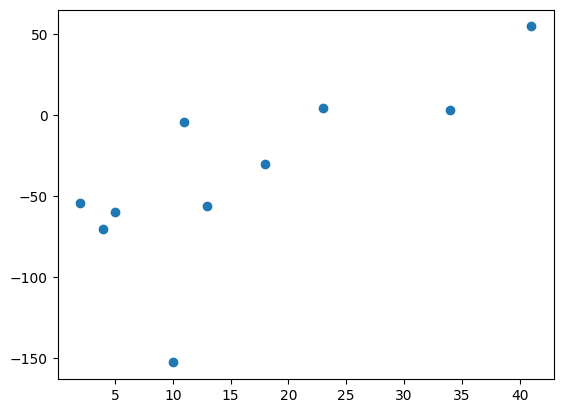

In [20]:
plt.scatter(e_test_ml.index, e_test_ml)

Исходя из диаграммы, имеется сравнительно небольшое количество больших остатков. Значит, качество модели на обучающей выборке является высоким.

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [21]:
R2_test_ml = metrics.explained_variance_score(y1_test, y1_test_pred)
R2_test_ml

0.2623680504619178

Вычислим метрику MAPE с помощью функции mean_absolute_percentage_error

In [22]:
mape_test_ml = metrics.mean_absolute_percentage_error(y1_test, y1_test_pred) * 100
mape_test_ml

132.1287943997287

Напротив, большая величина метрики (намного больше, чем 15) также говорит о невысоком качестве модели на тестирующей выборке

###**Вывод**

Таким образом, исследуемая модель обладает более высоким качеством на обучающей выборке, нежели на обучающей выборке

Вычислим дополнительные характеристики - метрики MSE и MAE. Они потребуются для сравнения качества модели на обучающей и тестовой выборках.

Метрика MSE:

In [23]:
mse_test_ml = metrics.mean_squared_error(y1_test, y1_test_pred)
mse_test_ml

4183.715527211201

In [24]:
mae_test_ml = metrics.mean_absolute_error(y1_test, y1_test_pred)
mae_test_ml

48.98107079932478

Составим таблицу из значений найденных метрик на обучающей и тестовой выборках

In [25]:
ind = ['R', 'MAPE', 'MSE', 'MAE']
dat1 = [R2_ml, mape_ml, mse_ml, mae_ml]
dat2 = [R2_test_ml, mape_test_ml, mse_test_ml, mae_test_ml]

pd.DataFrame({
    'Metrics': ['R', 'MAPE', 'MSE', 'MAE'],
    'Train': [R2_ml, mape_ml, mse_ml, mae_ml],
    'Test': [R2_test_ml, mape_test_ml, mse_test_ml, mae_test_ml]
})

,Metrics,Train,Test
0,R,0.691867,0.262368
1,MAPE,119.371424,132.128794
2,MSE,2461.406436,4183.715527
3,MAE,37.511642,48.981071


#Улучшение качества модели

##Очистка данных

Построим диаграмму рассеяния, расположив выборочные значения стоимости коттеджа по горизонтальной оси

Text(0.5, 0, 'Выборочные значения')

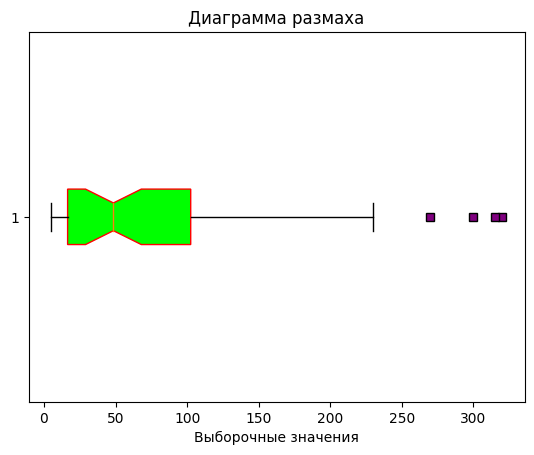

In [26]:
box = plt.boxplot(ds.Price, vert = False, notch = True, patch_artist = True,
                  flierprops = dict(markerfacecolor = 'purple', marker = 's'),
                  boxprops = dict(color = 'red', facecolor = 'lime' ))
plt.title("Диаграмма размаха")
plt.xlabel("Выборочные значения")

В выборке, по-видимому, присутствуют аномальные данные.
Генеральная совокупность возможно не симметрична (усы разной длины).

Выберем данные с помощью условия *Price < 250*

In [27]:
ds2 = ds[ds.Price < 250]
ds2

,Price,House,Area,Dist,Ter
0,220.0,500,40.0,26.0,1
1,95.0,530,19.0,23.0,0
2,45.0,350,7.0,25.0,0
3,120.0,150,10.0,26.0,1
4,95.0,370,15.0,45.0,1
5,120.0,300,24.0,20.0,1
6,16.5,78,8.5,60.0,0
7,25.0,80,10.0,50.0,1
8,20.0,65,6.0,25.0,0
9,20.0,90,6.0,45.0,0


После выборки данных с помощью условия Price < 250, были убраны аномальные данные

In [28]:
dif = len(ds) - len(ds2)
dif

4

Выделим целевую переменную Price в переменную y2

In [29]:
y2 = ds2['Price']
y2

0     220.0
1      95.0
2      45.0
3     120.0
4      95.0
5     120.0
6      16.5
7      25.0
8      20.0
9      20.0
10    100.0
11     25.0
12     50.0
13      8.5
14     16.5
17     60.0
18     14.0
19     38.0
20     85.0
21     85.0
22     28.0
23     83.0
24     80.0
25     15.0
26     27.0
27     42.0
28      5.5
29     47.0
30      5.0
31     59.0
32     27.0
34     96.0
35     95.0
36      6.0
37    120.0
38    135.0
40     10.0
41    230.0
42     15.0
43    130.0
44     16.5
45      7.0
46    110.0
47     13.0
Name: Price, dtype: float64

Выделим матрицу исходных признаков в переменную X2

In [30]:
X2 = ds2.drop('Price', axis = 1)
X2

,House,Area,Dist,Ter
0,500,40.0,26.0,1
1,530,19.0,23.0,0
2,350,7.0,25.0,0
3,150,10.0,26.0,1
4,370,15.0,45.0,1
5,300,24.0,20.0,1
6,78,8.5,60.0,0
7,80,10.0,50.0,1
8,65,6.0,25.0,0
9,90,6.0,45.0,0


Обучим модель с помощью выборки, не разделяя ее на обучающую и тестовую части

In [31]:
ml2 = model.fit(X2, y2)

Найдем предсказанные моделью значения зависимой переменной

In [32]:
y2_pred = ml2.predict(X2)

<!-- R2 -->
Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [33]:
R2test_m2 = metrics.explained_variance_score(y2, y2_pred)
R2test_m2

0.7166463357391579

Коэффициент детерминации стал больше по сравнению с предыдущей моделью, но несущественно. Попробуем отобрать данные, убирая в таблице ds2 строку, у которой в модели m2 самый большой остаток

In [34]:
e_ml2 = y2 - y2_pred
e_ml2

0      14.497845
1     -19.862234
2     -11.145696
3      48.783108
4      -2.508008
5     -16.230129
6       2.204046
7     -25.118789
8      -5.715462
9       3.953468
10    -42.228673
11    -14.639330
12     19.056992
13    -49.584985
14      0.178156
17     20.099410
18    -13.502539
19    -16.489402
20    -12.086023
21     -5.253930
22    -15.420587
23      6.692510
24    -30.250527
25    -33.349374
26     -9.956872
27    -20.027990
28     -1.543752
29     -0.415934
30     10.714397
31    -23.531829
32    -12.715268
34     26.084899
35     29.518723
36      7.123753
37    -38.360061
38     47.450685
40     14.999024
41    115.253847
42      5.933651
43     44.442423
44     -8.569358
45     -2.066349
46     36.281892
47    -22.695729
Name: Price, dtype: float64

Удалим в исходной матрице данных строки с достаточно большими значениями

In [35]:
ds3 = ds2.drop(labels = [38], axis = 0)


Выделим целевую переменную Price в переменную y3

In [36]:
y3 = ds3['Price']
y3

0     220.0
1      95.0
2      45.0
3     120.0
4      95.0
5     120.0
6      16.5
7      25.0
8      20.0
9      20.0
10    100.0
11     25.0
12     50.0
13      8.5
14     16.5
17     60.0
18     14.0
19     38.0
20     85.0
21     85.0
22     28.0
23     83.0
24     80.0
25     15.0
26     27.0
27     42.0
28      5.5
29     47.0
30      5.0
31     59.0
32     27.0
34     96.0
35     95.0
36      6.0
37    120.0
40     10.0
41    230.0
42     15.0
43    130.0
44     16.5
45      7.0
46    110.0
47     13.0
Name: Price, dtype: float64

Выделим матрицу исходных признаков в переменную X3

In [37]:
X3 = ds3.drop('Price', axis=1)
X3

,House,Area,Dist,Ter
0,500,40.0,26.0,1
1,530,19.0,23.0,0
2,350,7.0,25.0,0
3,150,10.0,26.0,1
4,370,15.0,45.0,1
5,300,24.0,20.0,1
6,78,8.5,60.0,0
7,80,10.0,50.0,1
8,65,6.0,25.0,0
9,90,6.0,45.0,0


Обучим модель  с помощью выборки, не разделяя ее на обучающую и тестовую части

In [38]:
m3 = model.fit(X3, y3)

Найдем предсказанные моделью значения зависимой переменной

In [39]:
y3_pred = m3.predict(X3)

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [40]:
R2test_m3 = metrics.explained_variance_score(y3, y3_pred)
R2test_m3

0.7230298103460846

In [41]:
e_m3 = y3 - y3_pred
e_m3

0      17.156682
1     -20.739551
2     -11.750696
3      51.686436
4      -1.140533
5     -13.188323
6       2.251399
7     -22.507833
8      -4.721237
9       4.218965
10    -41.091947
11    -13.695996
12     20.530924
13    -46.397363
14      0.562847
17     20.686549
18    -11.881805
19    -13.097056
20    -11.739486
21     -4.092122
22    -12.408819
23      6.991377
24    -27.011469
25    -30.365653
26    -10.753447
27    -19.128399
28     -1.771752
29     -1.593318
30     10.075271
31    -23.898452
32    -11.720328
34     25.840804
35     30.205208
36      7.120383
37    -35.073439
40     14.187822
41    117.354429
42      5.389325
43     47.731821
44     -8.442891
45     -2.610675
46     39.097960
47    -20.265612
Name: Price, dtype: float64

Коэффициент детерминации стал больше по сравнению с предыдущей моделью, но несущественно. Попробуем отобрать данные, убирая в таблице ds3 строку, у которой в модели m3 самый большой остаток

In [42]:
ds4 = ds3.drop(labels = [41], axis = 0)

Выделим целевую переменную Price в переменную y4

In [43]:
y4 = ds4['Price']

Выделим матрицу исходных признаков в переменную X4

In [44]:
X4 = ds4.drop('Price', axis=1)

Обучим модель  с помощью выборки, не разделяя ее на обучаую и тестовую части

In [45]:
m4 = model.fit(X4, y4)

Найдем предсказанные моделью значения зависимой переменной

In [46]:
y4_pred = m4.predict(X4)

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [47]:
R2test_m4 = metrics.explained_variance_score(y4, y4_pred)
R2test_m4

0.7946536725088469

In [48]:
e_m4 = y4 - y4_pred
e_m4

0     28.458609
1    -12.927500
2     -7.211270
3     57.235774
4     10.046890
5     -5.463533
6      0.616848
7    -18.089204
8     -7.392468
9      2.745387
10   -25.054164
11   -16.170548
12    26.435571
13   -43.899448
14    -1.730063
17    20.517117
18    -6.973229
19    -9.521360
20    -9.372275
21    -4.716295
22    -8.520275
23     7.551808
24   -21.284313
25   -27.188032
26    -9.962957
27    -9.911086
28    -4.167638
29     1.775719
30     8.172894
31   -18.329548
32   -13.083620
34    28.622585
35    30.137957
36     4.815823
37   -27.989052
40    12.347616
42     3.343485
43    52.256193
44   -10.926542
45    -4.656515
46    45.133092
47   -15.672434
Name: Price, dtype: float64

Коэффициент детерминации стал больше по сравнению с предыдущей моделью, но несущественно. Попробуем отобрать данные, убирая в таблице ds4 строку, у которой в модели m4 самый большой остаток

In [49]:
ds5 = ds4.drop(labels = [3], axis = 0)

Выделим целевую переменную Price в переменную y5

In [50]:
y5 = ds5['Price']

Выделим матрицу исходных признаков в переменную X5

In [51]:
X5 = ds5.drop('Price', axis=1)

Обучим модель  с помощью выборки, не разделяя ее на обучаую и тестовую части

In [52]:
m5 = model.fit(X5, y5)

Найдем предсказанные моделью значения зависимой переменной

In [53]:
y5_pred = m5.predict(X5)

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [54]:
R2test_m5 = metrics.explained_variance_score(y5, y5_pred)
R2test_m5

0.824750403982233

Коэффициент детерминации превысил величину 0,8. Перейдем к обучению данной модели.

##Обучение модели

Разделим выборку на обучающую и тестовую, отнеся в тестовую часть 20% данных, а в обучающую - остальные 80%.

Используем функцию train_test_split

In [55]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, train_size = 0.8)
X5_train, X5_test, y5_train, y5_test

(    House  Area   Dist  Ter
 32    130   6.0   12.0    0
 26    180  17.0   86.0    0
 13     22  14.0   50.0    1
 40     36  12.0  105.0    0
 0     500  40.0   26.0    1
 43    130  15.0   27.0    1
 2     350   7.0   25.0    0
 46    170  10.0   25.0    1
 7      80  10.0   50.0    1
 10    600  15.0    7.0    1
 34    300  15.0   39.0    0
 25     36  10.0   46.0    1
 23    228  20.0   45.0    0
 28     36  12.0   85.0    0
 30     36  10.0   95.0    0
 42     46  15.0  100.0    0
 6      78   8.5   60.0    0
 35    200  14.0   25.0    0
 21    210  20.0   19.0    0
 20    320  20.0   25.0    0
 14     60   8.0   51.0    0
 18     60  11.0   90.0    1
 27    250  15.0   85.0    1
 5     300  24.0   20.0    1
 19     65   6.0   18.0    1
 29    285  15.0   74.0    0
 9      90   6.0   45.0    0
 36     36   6.0   65.0    0
 8      65   6.0   25.0    0
 1     530  19.0   23.0    0
 17    170   6.0   18.0    0
 45     46  15.0  100.0    0,
     House  Area  Dist  Ter
 22     60   5

Введем новый объект - модель линейной регрессии

In [56]:
model_cleared_data = LinearRegression(fit_intercept=True)

Обучаем модель на наших данных

In [57]:
ml_cleared = model_cleared_data.fit(X5_train, y5_train)

Посмотрим на результат обучения. Оценки коэффициентов перед признаками

In [58]:
ml_cleared.coef_

array([ 0.04827508,  4.27760628, -0.73196767,  8.46831151])

Оценка свободного коэффициента

In [59]:
ml_cleared.intercept_

20.028763408891763

##Тестирование и оценка качества

###Оценка качества модели на обучающей выборке

Выполним предсказание значений целевой функции моделью
с помощью метода predict

In [60]:
y5_pred_ = ml_cleared.predict(X5_train)
y5_pred_

array([ 4.31865496e+01,  3.84883651e+01,  5.28472311e+01, -3.75866374e+00,
        2.04707707e+02,  7.91738025e+01,  4.85690940e+01,  6.11807097e+01,
        3.85367607e+01,  1.16502444e+02,  7.01286427e+01,  3.93405278e+01,
        8.36490623e+01,  1.08806897e+01, -4.99419959e+00,  1.32167443e+01,
        1.62358129e+01,  7.12710757e+01,  1.01811270e+02,  1.02729723e+02,
        1.98157673e+01,  1.25701585e+01,  4.25126874e+01,  1.31002796e+02,
        4.41251748e+01,  4.37856481e+01,  1.71006132e+01, -1.45594586e-01,
        3.05330896e+01,  1.10053819e+02,  4.07257468e+01,  1.32167443e+01])

Вычислим остатки - разности между имеющимися значениями и предсказанными значениями целевой переменной

In [61]:
e_cleared_ml = y5_train - y5_pred_
e_cleared_ml

32   -16.186550
26   -11.488365
13   -44.347231
40    13.758664
0     15.292293
43    50.826197
2     -3.569094
46    48.819290
7    -13.536761
10   -16.502444
34    25.871357
25   -24.340528
23    -0.649062
28    -5.380690
30     9.994200
42     1.783256
6      0.264187
35    23.728924
21   -16.811270
20   -17.729723
14    -3.315767
18     1.429842
27    -0.512687
5    -11.002796
19    -6.125175
29     3.214352
9      2.899387
36     6.145595
8    -10.533090
1    -15.053819
17    19.274253
45    -6.216744
Name: Price, dtype: float64

Построим диаграмму остатков

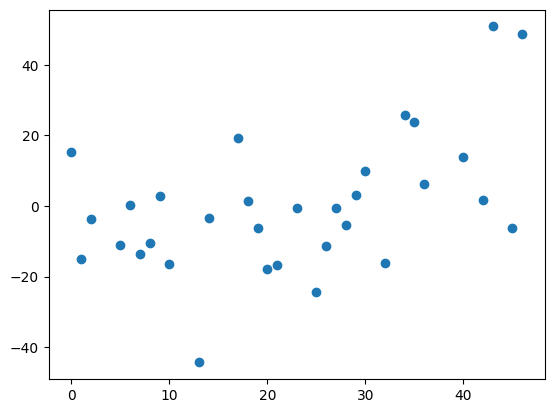

In [62]:
plt.scatter(e_cleared_ml.index, e_cleared_ml)

Исходя из диаграммы, имеется много больших остатков. Значит, качество модели на обучающей выборке является невысоким.

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [63]:
R2_cleared_ml = metrics.explained_variance_score(y5_train, y5_pred_)
R2_cleared_ml

0.8467875007995324

Значение R2 больше 0.8, это значит, что модель хорошо показывает на обучающей выборке

Вычислим метрику MAPE с помощью функции mean_absolute_percentage_error

In [64]:
mape_cleared_ml = metrics.mean_absolute_percentage_error(y5_train, y5_pred_) * 100
mape_cleared_ml

58.364823644241014

Вычислим дополнительные характеристики - метрики MSE и MAE. Они потребуются для сравнения качества модели на обучающей и тестовой выборках.

Метрика MSE:

In [65]:
mse_cleared_ml = metrics.mean_squared_error(y5_train, y5_pred_)
mse_cleared_ml

367.16163498583944

Метрика MAE:

In [66]:
mae_cleared_ml = metrics.mean_absolute_error(y5_train, y5_pred_)
mae_cleared_ml

13.956362275660862

###Оценка качества модели на тестовой выборке

Выполним предсказание значений целевой функции моделью с помощью метода predict

In [67]:
y5_test_pred = ml_cleared.predict(X5_test)
y5_test_pred

array([ 30.82258106, 159.36790535,  77.5844039 ,  76.49265118,
        20.94358474,  31.99868683,  47.03088123, 105.40502492,
        13.88339381])

Вычислим остатки - разности между имеющимися значениями и предсказанными значениями целевой переменной

In [68]:
e_cleared_test_ml = y5_test - y5_test_pred
e_cleared_test_ml

22    -2.822581
37   -39.367905
4     17.415596
31   -17.492651
47    -7.943585
44   -15.498687
11   -22.030881
24   -25.405025
12    36.116606
Name: Price, dtype: float64

Построим диаграмму остатков

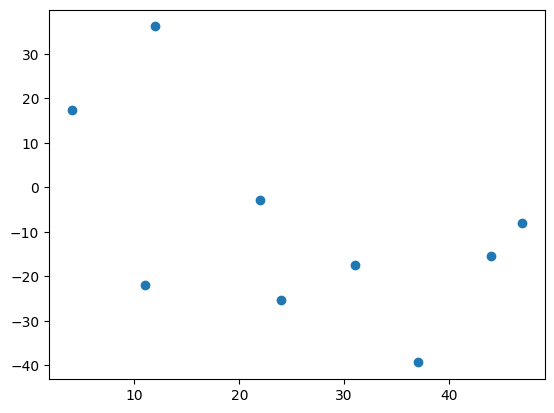

In [69]:
plt.scatter(e_cleared_test_ml.index, e_cleared_test_ml)

Исходя из диаграммы, имеется немного больших остатков. Значит, качество модели на тестовой выборке является высоким.

Вычислим коэффициент детерминации с помощью функции explained_variance_score

In [70]:
R2_cleared_test_ml = metrics.explained_variance_score(y5_test, y5_test_pred)
R2_cleared_test_ml

0.6261463501039144

Вычислим метрику MAPE с помощью функции mean_absolute_percentage_error

In [71]:
mape_cleared_test_ml = metrics.mean_absolute_percentage_error(y5_test, y5_test_pred) * 100
mape_cleared_test_ml

48.668550438170314

###**Вывод**

Таким образом, исследуемая модель обладает более высоким качеством на тестовой выборке, нежели на обучающей выборке, то есть модель недообучена

Вычислим дополнительные характеристики - метрики MSE и MAE. Они потребуются для сравнения качества модели на обучающей и тестовой выборках.

Метрика MSE:

In [72]:
mse_cleared_test_ml = metrics.mean_squared_error(y5_test, y5_test_pred)
mse_cleared_test_ml

545.0654291403393

Метрика MAE:

In [73]:
mae_cleared_test_ml = metrics.mean_absolute_error(y5_test, y5_test_pred)
mae_cleared_test_ml

20.454835289395895

In [74]:
ind = ['R2', 'MAPE', 'MSE', 'MAE']
dat1 = [R2_cleared_ml, mape_cleared_ml, mse_cleared_ml, mae_cleared_ml]
dat2 = [R2_cleared_test_ml, mape_cleared_test_ml, mse_cleared_test_ml, mae_cleared_test_ml]

pd.DataFrame({
    'Metrics': ['R2', 'MAPE', 'MSE', 'MAE'],
    'Train': [R2_cleared_ml, mape_cleared_ml, mse_cleared_ml, mae_cleared_ml],
    'Test': [R2_cleared_test_ml, mape_cleared_test_ml, mse_cleared_test_ml, mae_cleared_test_ml]
})

,Metrics,Train,Test
0,R2,0.846788,0.626146
1,MAPE,58.364824,48.668550
2,MSE,367.161635,545.065429
3,MAE,13.956362,20.454835


Вывод:

$R^2$ стал лучше на тестовой выборке, но MAPE стали хуже на тестовой выборке, а MSE, MAE хуже на обучающей выборке, следовательно нельзя сказать модель переобучена или недообучена.

#Заключение

Целью нашей работы было: предсказать стоимость коттеджа по его признакам. Мы провели тестирование и оценку качества модели на обучающей и тестовой выборках используя модель линейной регрессии, пользуясь библиотеками pandas, matplotlib.pyplot, numpy и stats и необходимыми нам инструментами пакета Scikit-learn.

Мы улучшили качество модели посредством дополнительной очистки данных и ее переобучения.

Проведя повторную оценку и тестирование модели, мы не можем сделать вывод, что данная модель получилась переобученной или недообученой, так как она показывает половину хороших результатов на тестовой выборке и половину хороших на обучающей выборке.